<h1 style="font-size:3rem;color:teal">House Price Prediction</h1>

### <b>To develop a machine learning model for predicting house price, we need to use the programming language: Python and it's libraries: Scikit-learn (For Machine Learning Algorithms) and Tensorflow (For Neural Networks)</b>

## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

#Data Preprocessing
import pandas as pd

#Encoding Categorical values to Numerical values
from sklearn.preprocessing import LabelEncoder
import joblib

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Split Data Into Training And Testing Data
from sklearn.model_selection import train_test_split 

#Machine Learning Algorithms
from sklearn.linear_model import LinearRegression #Linear Regression
from sklearn.tree import DecisionTreeRegressor #Decision Tree
from sklearn.ensemble import RandomForestRegressor #Random Forest Regression
from sklearn.metrics import mean_squared_error

#Evaluate Models
from sklearn.metrics import mean_squared_error, r2_score

#Neural Networks
from tensorflow.keras.models import Sequential #Neural Networks
from tensorflow.keras.layers import Dense #Hidden Layer
from tensorflow.keras.losses import SparseCategoricalCrossentropy # Updated loss function

## Data Collection

In [2]:
dataset_path = "HousePriceData.csv"
data= pd.read_csv(dataset_path)
data.head(11)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
5,1300.0,4,3.0,Semi-Furnished,Rohini Sector 24,1.0,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0
6,1350.0,4,3.0,Semi-Furnished,Rohini Sector 24,1.0,10000000,Ready_to_move,Resale,Builder_Floor,6667.0
7,650.0,2,2.0,Semi-Furnished,"Delhi Homes, Rohini Sector 24",1.0,4000000,Ready_to_move,New_Property,Apartment,6154.0
8,985.0,3,3.0,Unfurnished,Rohini Sector 21,1.0,6800000,Almost_ready,New_Property,Builder_Floor,6154.0
9,1300.0,4,4.0,Semi-Furnished,Rohini Sector 22,1.0,15000000,Ready_to_move,New_Property,Builder_Floor,6154.0


## Data Preprocessing

### <b>Drop 'Locality' column and check for null values

In [3]:
data= data.drop('Locality', axis=1)

In [4]:
data.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

### <b>Handle the missing values</b>
    For categorical features, fill the missing value with frequently repeated data.
    For numerical features, fill the missing value with the median

In [5]:
#Categorical Features
data['Furnishing'].fillna(data['Furnishing'].mode()[0], inplace=True)
data['Type'].fillna(data['Type'].mode()[0], inplace=True)

#Numerical Features
data['Bathroom'].fillna(data['Bathroom'].median(), inplace=True)
data['Parking'].fillna(data['Parking'].median(), inplace=True)
data['Per_Sqft'].fillna(data['Per_Sqft'].median(), inplace=True)


### <b>Check if missing values are resolved</b>

In [6]:
data.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

### <b>Convert the categorical labels into numerical values<b>
    Save the label encoder and class mappings for further use

In [7]:
label_encoder = LabelEncoder() #Instance Label Encoder
class_mapping = {} #Dictionary to store classes and their corresponding numerical values

# Fit and transform each categorical column in your data
for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = label_encoder.fit_transform(data[i])
        # Store class mapping for the current column
        class_mapping[i] = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Print the class mappings for each categorical column
for column, mapping in class_mapping.items():
    print(f"Class mapping for column '{column}': {mapping}")

Class mapping for column 'Furnishing': {'Furnished': 0, 'Semi-Furnished': 1, 'Unfurnished': 2}
Class mapping for column 'Status': {'Almost_ready': 0, 'Ready_to_move': 1}
Class mapping for column 'Transaction': {'New_Property': 0, 'Resale': 1}
Class mapping for column 'Type': {'Apartment': 0, 'Builder_Floor': 1}


In [8]:
joblib.dump(label_encoder, 'label_encoder.joblib') #Save the label encoder

['label_encoder.joblib']

In [9]:
joblib.dump(class_mapping, 'class_mappings.joblib') #Save the class mappings

['class_mappings.joblib']

## Feature Selection

### <b>Perform correlation analysis to identify features that play major role in the prediction of House Price. And plot the heatmap for the correlation</b>

Relevant Features: ['Area', 'BHK', 'Bathroom', 'Price']


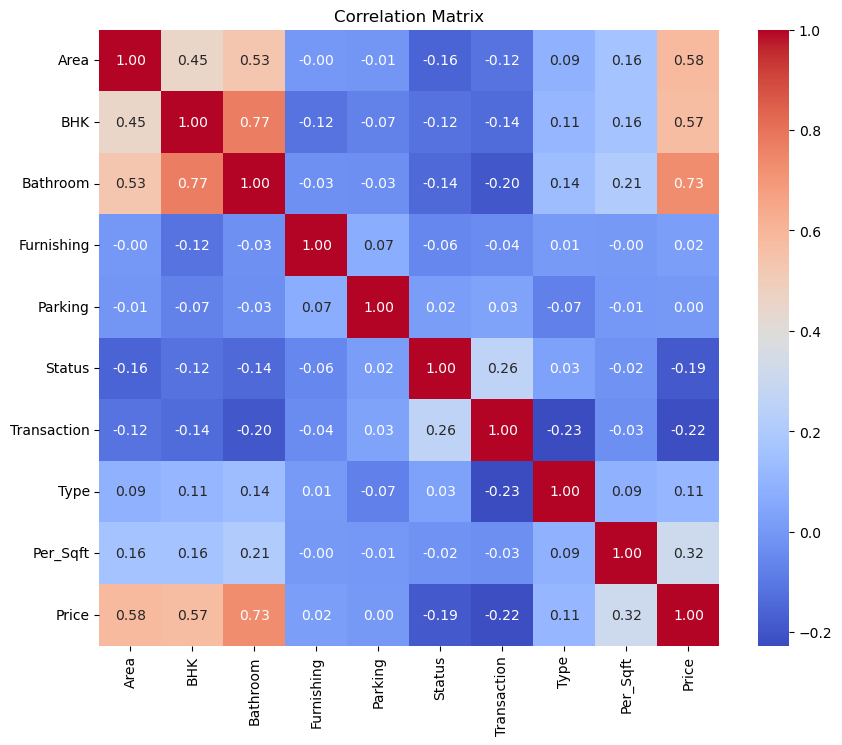

In [10]:
x = data.drop('Price', axis=1)
y = data['Price']

# Concatenate features and target variable for correlation analysis
correlation_data = pd.concat([x, y], axis=1)

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Set a correlation threshold
correlation_threshold = 0.5

# Identify features highly correlated with the target variable
relevant_features = correlation_matrix['Price'].abs() > correlation_threshold
relevant_features = relevant_features[relevant_features].index.tolist()

# Print or visualize the relevant features
print("Relevant Features:", relevant_features)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


## Split Data

In [11]:
x = data.drop('Price', axis=1)
y = data['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Choose Algorithms

<ul>
    <li><b>Linear Regression</b>: Simple and quick</li>
    <li><b>Decision Trees</b>: Good for capturing complex relationships</li>
    <li><b>Random Forest</b>: Ensemble method, robust and accurate</li>
    <li><b>Neural Networks</b>: Deep learning for more complex patterns./li>
</ul>

## Train Models

### Scikit-Learning Algorithms

In [12]:
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor()
forest_model = RandomForestRegressor()

In [13]:
linear_model.fit(x_train, y_train)

LinearRegression()

In [14]:
tree_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [15]:
forest_model.fit(x_train, y_train)

RandomForestRegressor()

### Neural Networks

In [16]:
neural_model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(1)  # Output layer
])

neural_model.compile(optimizer='adam', loss='mean_squared_error')

neural_model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))



Epoch 1/50

32/32 [==============================] - 1s 9ms/step - loss: 1061182936973312.0000 - val_loss: 1298200572985344.0000
Epoch 2/50
32/32 [==============================] - 0s 4ms/step - loss: 1060887993516032.0000 - val_loss: 1297809596743680.0000
Epoch 3/50
32/32 [==============================] - 0s 4ms/step - loss: 1060556811272192.0000 - val_loss: 1297354464428032.0000
Epoch 4/50
32/32 [==============================] - 0s 4ms/step - loss: 1060168989147136.0000 - val_loss: 1296823901749248.0000
Epoch 5/50
32/32 [==============================] - 0s 3ms/step - loss: 1059708353904640.0000 - val_loss: 1296237504495616.0000
Epoch 6/50
32/32 [==============================] - 0s 4ms/step - loss: 1059201614872576.0000 - val_loss: 1295497025290240.0000
Epoch 7/50
32/32 [==============================] - 0s 4ms/step - loss: 1058571663966208.0000 - val_loss: 1294693866405888.0000
Epoch 8/50
32/32 [==============================] - 0s 5ms/step - loss: 1057865410281472.0000 - val_l

## Evaluate Models

### <b><ul><li>MSE gives you an idea of how close the predictions are to the actual values</li><li>R-squared provides a measure of how well your model explains the variance in the target variable</li></ul></b>

In [17]:
#Test the models
linear_predictions = linear_model.predict(x_test)
tree_predictions = tree_model.predict(x_test)
forest_predictions = forest_model.predict(x_test)
neural_network_predictions = neural_model.predict(x_test)

# Calculate Mean Squared Error
linear_mse = mean_squared_error(y_test, linear_predictions)
tree_mse = mean_squared_error(y_test, tree_predictions)
forest_mse = mean_squared_error(y_test, forest_predictions)
neural_network_mse = mean_squared_error(y_test, neural_network_predictions)

# Calculate R-squared
linear_r2 = r2_score(y_test, linear_predictions)
tree_r2 = r2_score(y_test, tree_predictions)
forest_r2 = r2_score(y_test, forest_predictions)
neural_network_r2 = r2_score(y_test, neural_network_predictions)

print("Linear Regression MSE:", linear_mse)
print("Decision Tree MSE:", tree_mse)
print("Random Forest MSE:", forest_mse)
print("Neural Network MSE:", neural_network_mse)

print("\nLinear Regression R-squared:", linear_r2)
print("Decision Tree R-squared:", tree_r2)
print("Random Forest R-squared:", forest_r2)
print("Neural Network R-squared:", neural_network_r2)


8/8 [==============================] - 0s 2ms/step
Linear Regression MSE: 309497639267002.06
Decision Tree MSE: 177182185758377.44
Random Forest MSE: 135363524478386.72
Neural Network MSE: 1140736014864799.5

Linear Regression R-squared: 0.5907416802732128
Decision Tree R-squared: 0.7657065049002322
Random Forest R-squared: 0.8210046166700217
Neural Network R-squared: -0.5084305838360377


### <b><ul><li>Check the Accuracy of the models</li></ul></b>

In [18]:
linear_score = linear_model.score(x, y)
tree_score = tree_model.score(x, y)
forest_score = forest_model.score(x, y)

print("Linear Regression Accuracy (Full Dataset):", linear_score)
print("Decision Tree Accuracy (Full Dataset):", tree_score)
print("Random Forest Accuracy (Full Dataset):", forest_score)

Linear Regression Accuracy (Full Dataset): 0.6134208527952894
Decision Tree Accuracy (Full Dataset): 0.945544887679223
Random Forest Accuracy (Full Dataset): 0.9418177822452984


## Predictions

In [19]:
new_data = pd.DataFrame({
    'Area': [840.0],
    'BHK': [4],
    'Bathroom': [4.0],
    'Furnishing': ['Semi-Furnished'],
    'Parking': [2.0],
    'Status': ['Ready_to_move'],
    'Transaction': ['Resale'],
    'Type': ['Apartment'],
    'Per_Sqft': [6667.0]
})

label_encoder = joblib.load('label_encoder.joblib')
class_mappings = joblib.load('class_mappings.joblib')

# Use label mappings to encode categorical columns in new data
for column in new_data.columns:
    if column in class_mappings:
        new_data[column] = new_data[column].map(class_mappings[column])


new_predictions_linear = linear_model.predict(new_data)
new_predictions_tree = tree_model.predict(new_data)
new_predictions_forest = forest_model.predict(new_data)
new_predictions_neural = neural_model.predict(new_data)


print("Predicted Price (Linear Regression):", new_predictions_linear[0])
print("Predicted Price (Decision Tree):", new_predictions_tree[0])
print("Predicted Price (Random Forest Regression):", new_predictions_forest[0])
print("Predicted Price (Neural Network):", new_predictions_neural[0][0])

1/1 [==============================] - 0s 22ms/step
Predicted Price (Linear Regression): 35878587.40341166
Predicted Price (Decision Tree): 35000000.0
Predicted Price (Random Forest Regression): 16851700.0
Predicted Price (Neural Network): 1041771.1
